In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv("downloads/student.csv")

In [7]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [10]:
data.shape

(1000, 8)

In [11]:
data.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [12]:
data['gender'].dtypes

dtype('O')

In [13]:
data['gender'].dtypes == 'O'

True

In [18]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [23]:
cat_col=[fea for fea in data.columns if data[fea].dtype == 'O']

In [24]:
num_col=[fea for fea in data.columns if data[fea].dtype != 'O']

In [25]:
data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

In [27]:
#missing value

data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [28]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [29]:
data.isnull().sum().sum()

0

In [30]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [32]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [33]:
data.describe()# just for numerical columns

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [34]:
data.describe(include="all")#use this to get all columns

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [35]:
data.describe().T  # transpose 

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [36]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [37]:
data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [38]:
data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

<AxesSubplot:xlabel='math score', ylabel='Density'>

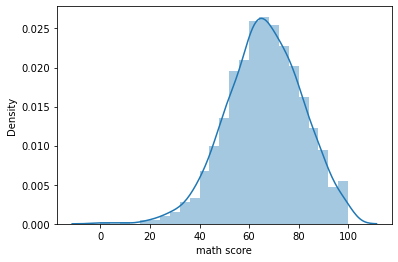

In [69]:
sns.distplot(data['math score'])

In [41]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [45]:
data['avg']=(data['math score']+data['reading score']+data['writing score'])/3

In [46]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [50]:
data.groupby('gender').mean()

,math score,reading score,writing score,avg
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [51]:
data.groupby('gender').mean().count()

math score       2
reading score    2
writing score    2
avg              2
dtype: int64

In [52]:
#Find number of students who got less then 30 marks in maths

data[data['math score'] < 30].count()

gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
avg                            14
dtype: int64

In [ ]:
p value

if p > 0.05

In [54]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'avg'],
      dtype='object')

In [59]:
data_num = data[num_col]

In [60]:
data_num.head

<bound method NDFrame.head of      math score  reading score  writing score
0            72             72             74
1            69             90             88
2            90             95             93
3            47             57             44
4            76             78             75
..          ...            ...            ...
995          88             99             95
996          62             55             55
997          59             71             65
998          68             78             77
999          77             86             86

[1000 rows x 3 columns]>

In [61]:
from scipy.stats import normaltest

In [64]:
normaltest(data_num['math score'])[1] * 100

0.04508029386993784

In [65]:
#if p > 0.05 then my data will be normally distributed 

<AxesSubplot:xlabel='math score', ylabel='Density'>

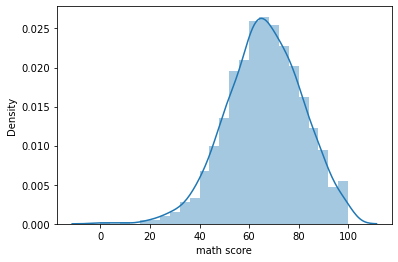

In [68]:
sns.distplot(data_num['math score'])

In [67]:
#outlier

<AxesSubplot:>

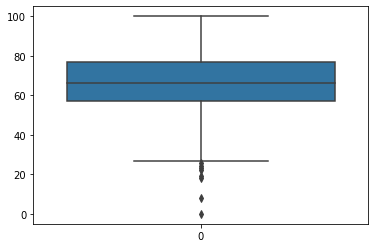

In [70]:
sns.boxplot(data=data['math score'])

<AxesSubplot:>

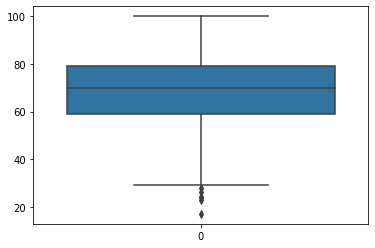

In [72]:
sns.boxplot(data=data['reading score'])

<AxesSubplot:>

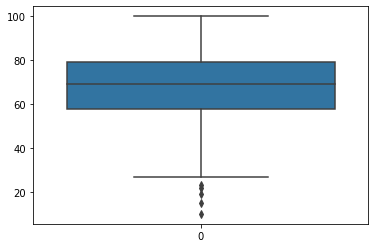

In [71]:
sns.boxplot(data=data['writing score'])

In [73]:
data['math score'].quantile(0.10)

47.0

In [74]:
data['math score'].quantile(0.90)

86.0

In [75]:
data['math score'].min()

0

In [76]:
data['math score'].max()

100

In [78]:
data['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [79]:
q1 = data['math score'].quantile(0.10)

In [80]:
q3 = data['math score'].quantile(0.90)

In [81]:
IQR = q3 - q1

In [82]:
IQR

39.0

In [83]:
upper_limit = q3+(1.5*IQR)

In [84]:
lower_limit = q1-(1.5*IQR)

In [85]:
upper_limit

144.5

In [86]:
lower_limit

-11.5

In [88]:
data[data['math score']<lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg


In [89]:
data[data['math score']>upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg


<b>Graph analysis</b>

<AxesSubplot:xlabel='gender', ylabel='count'>

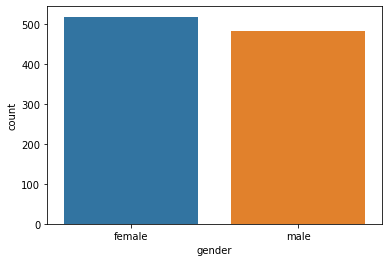

In [94]:
sns.countplot(data['gender'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

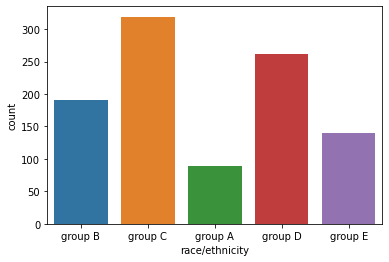

In [95]:
sns.countplot(data['race/ethnicity'])

In [97]:
df=data.groupby('gender').mean()

In [98]:
df['avg']

gender
female    69.569498
male      65.837483
Name: avg, dtype: float64

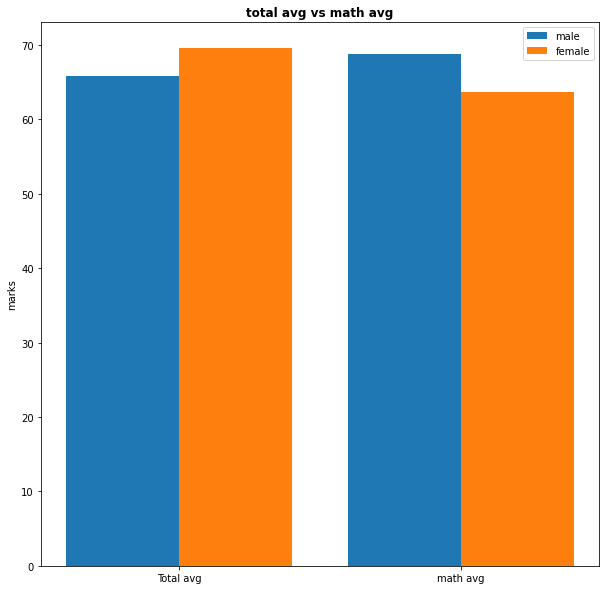

In [106]:
plt.figure(figsize=(10,10))
X=['Total avg','math avg']
female_score=df['avg'][0],df['math score'][0]
male_score=df['avg'][1],df['math score'][1]
X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,male_score,0.4,label='male')
plt.bar(X_axis+0.2,female_score,0.4,label='female')

plt.xticks(X_axis,X)
plt.ylabel("marks")
plt.title("total avg vs math avg",fontweight='bold')
plt.legend()
plt.show()

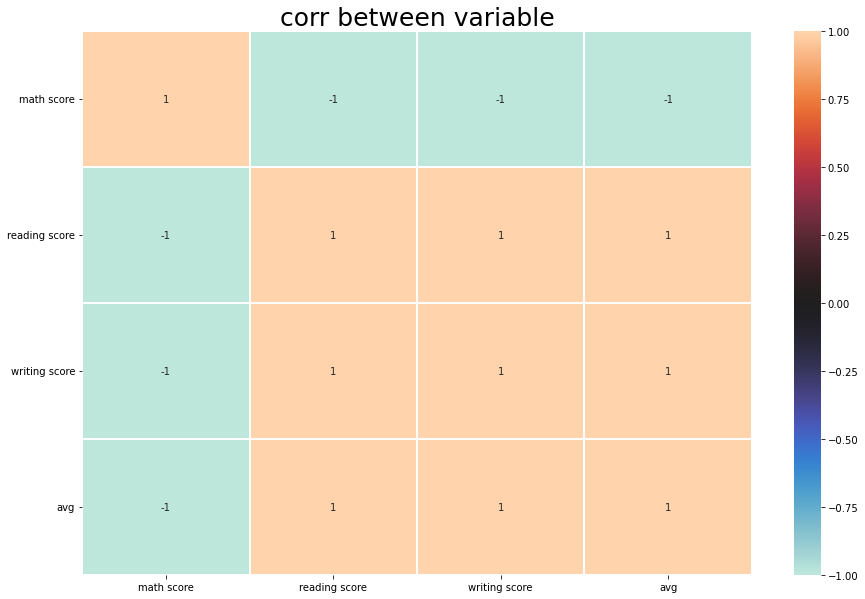

In [108]:
sns.heatmap(df.corr(),annot = True ,cmap ='icefire',linewidth = 0.3)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("corr between variable", color = "black" ,size =25)
plt.show()

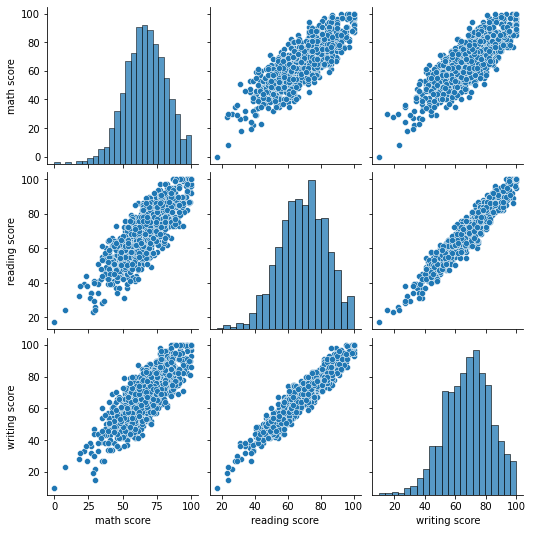

In [110]:
sns.pairplot(data_num)